# Fall 2024 Analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
F24 = pd.read_excel(r'C:\Users\HP\Desktop\SWC_MATH_CENTER\FALL24.xlsx', dtype={'Student_ID' : str})
#F24.info()

In [9]:
F24.head(11)

,Full_Name,Student_ID,Sched_Date,Seconds,Start_Time,Stop_Time,Subject,Subject_Course
0,"RODRIGUEZ, EMILIO G",1160731,2024-11-12,332,10:36:22,10:41:54,ACCT,ACCT 101
1,"DELA CRUZ, MICHAELA A",1125159,2024-11-25,8,14:14:23,14:14:31,ADN,ADN 112
2,"LUCIN, ARIANNA C",1083846,2024-11-25,22,08:48:24,08:48:46,ADN,ADN 112
3,"BANDALA, DULCE E",1132017,2024-10-28,6106,11:56:23,13:38:09,ADN,ADN 112L
4,"CASTRO, ISA",1126369,2024-10-28,14918,10:53:12,15:01:50,ADN,ADN 112L
5,"JIMENEZ, CARLA A",0743538,2024-10-28,16171,10:32:24,15:01:55,ADN,ADN 112L
6,"BANDALA, DULCE E",1132017,2024-10-29,1798,15:08:49,15:38:47,ADN,ADN 112L
7,"ARCE, ISABEL A",1073810,2024-11-12,7,13:05:28,13:05:35,ADN,ADN 112L
8,"ARCE, ISABEL A",1073810,2024-11-12,1009,13:05:42,13:22:31,ADN,ADN 112L
9,"CASILLAS, SUSAN N",1045626,2024-11-12,1042,13:05:15,13:22:37,ADN,ADN 112L


In [36]:
print(f"We served a total of {F24['Student_ID'].nunique()} different students")

We served a total of 366 different students


In [38]:
print(f"There were a total of {round((F24['Seconds'].sum())/3600, 1)} hours of direct tutoring,\nor what is the same \n{round((F24['Seconds'].sum())/3600/24, 1)} days")

There were a total of 666.7 hours of direct tutoring,
or what is the same 
27.8 days


In [40]:
print(f"We helped on {F24['Subject_Course'].nunique()} different courses some of which are not even math classes")

We helped on 51 different courses some of which are not even math classes


## Pie Chart

This chart helps us see which math classes require the most support. 

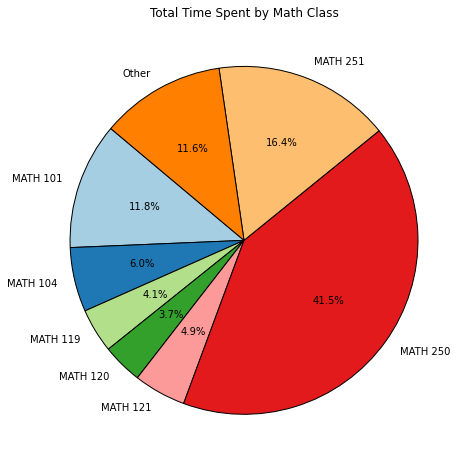

In [35]:
F24_MATH = F24[F24["Subject"] == "MATH"]  # Filter only MATH subjects
F24_MATH = F24_MATH.groupby("Subject_Course")["Seconds"].sum().reset_index()  # Group and sum
# Convert seconds to hours and round up
F24_MATH["Hours"] = np.ceil(F24_MATH["Seconds"] / 3600)

# Drop the original seconds column if not needed
F24_MATH = F24_MATH.drop(columns=["Seconds"])
# Calculate total hours
total_hours = F24_MATH["Hours"].sum()

# Identify courses contributing less than 3%
F24_MATH["Percentage"] = (F24_MATH["Hours"] / total_hours) * 100
small_courses = F24_MATH["Percentage"] < 3

# Aggregate small courses into "Other"
if small_courses.any():
    other_hours = F24_MATH.loc[small_courses, "Hours"].sum()
    
    # Keep only large courses
    F24_MATH = F24_MATH.loc[~small_courses]
    
    # Create "Other" category as a new DataFrame and concatenate
    other_df = pd.DataFrame([{"Subject_Course": "Other", "Hours": other_hours}])
    F24_MATH = pd.concat([F24_MATH, other_df], ignore_index=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    F24_MATH["Hours"], 
    labels=F24_MATH["Subject_Course"], 
    autopct="%1.1f%%",  
    colors=plt.cm.Paired.colors,  
    startangle=140,  
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title("Total Time Spent by Math Class")

# Show the plot
plt.show()


It is clear that Calculus 1 is the one class that students need the most help on.

## Heat Map

This heat map tries to display the days and times the math center is the busiest. 

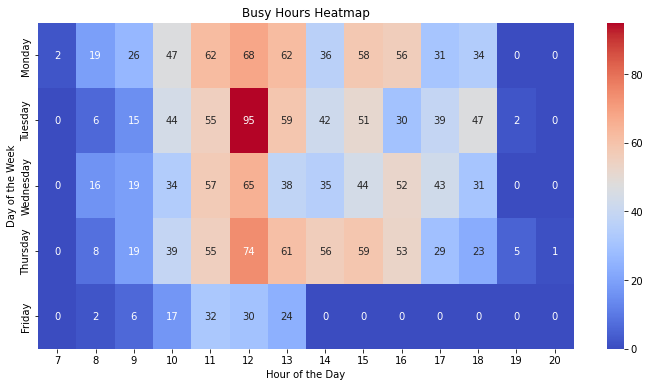

In [33]:
#Create a new data frame
F24_Ocuppation = F24[['Sched_Date' , 'Start_Time', 'Stop_Time']].copy()

# Convert 'Sched_Date' to datetime
F24_Ocuppation['Sched_Date'] = pd.to_datetime(F24_Ocuppation['Sched_Date'])

# Replace 'Sched_Date' with the weekday name
F24_Ocuppation['Sched_Date'] = F24_Ocuppation['Sched_Date'].dt.day_name()


# Convert 'Start_Time' to datetime and extract the hour
F24_Ocuppation['Start_Time'] = pd.to_datetime(F24_Ocuppation['Start_Time'], format='%H:%M:%S')
F24_Ocuppation['Hour'] = F24_Ocuppation['Start_Time'].dt.hour

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create pivot table with fill_value=0 to ensure no NaN values
heatmap_data = F24_Ocuppation.pivot_table(index='Sched_Date', columns='Hour', aggfunc='size', fill_value=0)

# Reindex to maintain correct weekday order and fill missing rows/columns
heatmap_data = heatmap_data.reindex(weekday_order, axis=0, fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt="d")
plt.title('Busy Hours Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


From the heat map we can see that between 11 am and 4 pm Monday through Thursday is when the Math centers is the busiest. 